# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

In [1]:
# run this
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcal

# Part A – Exploratory data analysis and data visualisation 

1. Using the pandas library, read the file dataset1.csv into a dataframe. Print or display the first five rows of the dataset. [1 mark]

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt


data1 = pd.read_csv('dataset1.csv')

data1.head(5)

,Monastery,Latitude,Longitude,City,Country,Administrative Region,Historical Region,Starting,Ending,Monastery_index
0,Cistercians,47.13,15.28,Seckau,Austria,Steiermark,STYRIA (AUSTRIA),1130,1958,0
1,Cistercians,48.05,16.13,Vienne,Austria,Niederoesterreich,STYRIA (AUSTRIA),1135,2011,0
2,Cistercians,48.61,15.20,Sanct Pölten,Austria,Niederoesterreich,STYRIA (AUSTRIA),1138,2011,0
3,Cistercians,48.20,14.74,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1142,1784,0
4,Cistercians,48.32,14.17,Linz,Austria,Oberoesterreich,STYRIA (AUSTRIA),1146,1945,0


2. Make a scatterplot from the dataset, with the Longitude column on the x axis, the Latitude column on the y axis, and the colour corresponding to the Monastery_index column. Within the scatterplot function, set the colour map to ’rainbow’. The result should be a scatterplot showing the position of every monastery, with different colours for monasteries with different values in Monastery_index.  [1 mark]

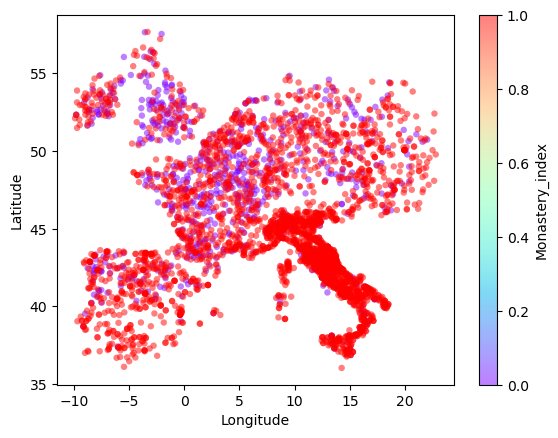

In [3]:
ax= data1.plot.scatter(x="Longitude", y="Latitude", c="Monastery_index", cmap="rainbow", linewidth=0.1, alpha=0.5)

3. Plot a histogram for the monastery starting year of activity, represented in the Starting column.
Add the title “Starting year” to the plot. [1 mark]

Text(0.5, 1.0, 'Starting Year')

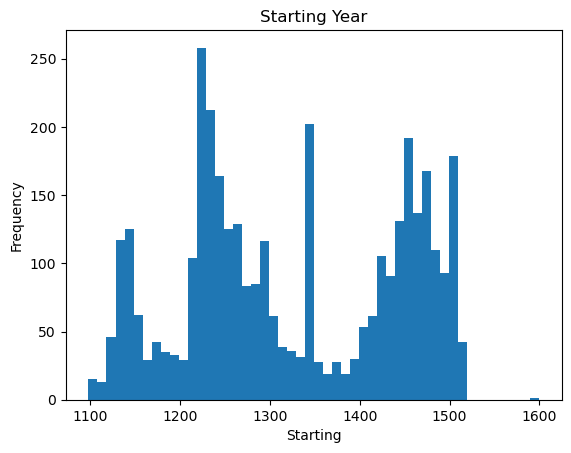

In [4]:
import matplotlib.pyplot as plt

plt.hist(x = data1["Starting"], bins = 50)
plt.xlabel('Starting')
plt.ylabel("Frequency")
plt.title("Starting Year")

4. Make a figure with two histograms, still using the Starting column:

a) One histogram representing the Cistercian monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Cistercians'.

b) And one histogram representing the Franciscan monasteries, corresponding to rows in the dataframe where the Monastery column is equal to 'Franciscans'.

c) Add a legend indicating which histogram corresponds to which type of monastery.

d) Add the title “Starting year” to the figure. 

[2 marks]

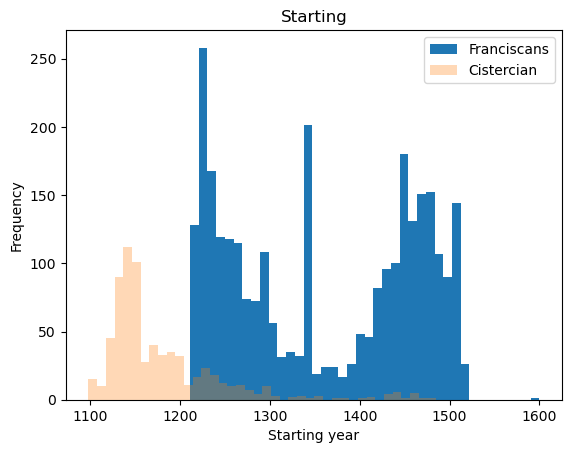

In [5]:
import matplotlib.pyplot as plt


#data1 - dataset1

plt.hist(x = data1.loc[data1["Monastery"]=="Franciscans","Starting"], bins = 40, label ="Franciscans")
plt.hist(x = data1.loc[data1["Monastery"]=="Cistercians","Starting"], bins = 40, alpha= 0.3,  label ="Cistercian")
plt.title("Starting")
plt.xlabel('Starting year')
plt.ylabel("Frequency")
plt.legend()

5. Repeat numbers 3 and 4, but for the Ending column. Add the title “Ending year” to the plot.
[2 marks]

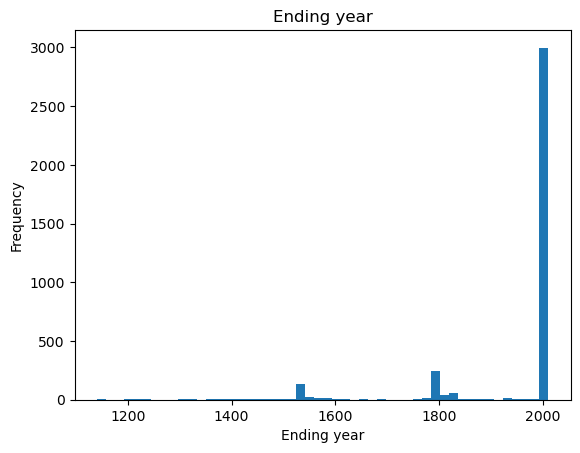

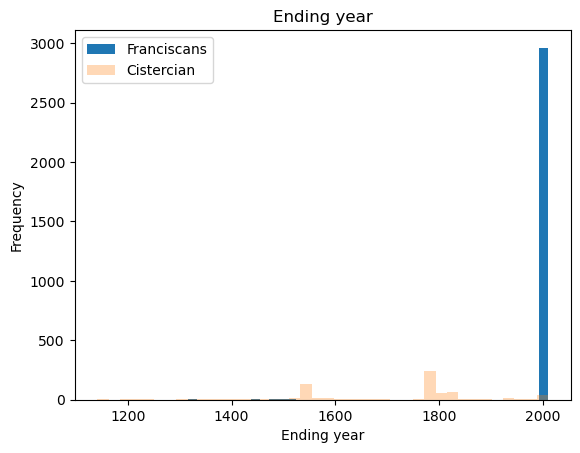

In [6]:
import matplotlib.pyplot as plt

plt.hist(x = data1["Ending"], bins = 50, label ="Ending")
plt.title("Ending year")
plt.xlabel('Ending year')
plt.ylabel("Frequency")
plt.show()

plt.hist(x = data1.loc[data1["Monastery"]=="Franciscans","Ending"], bins = 40, label ="Franciscans")
plt.hist(x = data1.loc[data1["Monastery"]=="Cistercians","Ending"], bins = 40, alpha= 0.3,  label ="Cistercian")
plt.title("Ending year")
plt.xlabel('Ending year')
plt.ylabel("Frequency")
plt.legend()
plt.show()




6. Count the number of times each country appears in the Country column. Use that to make a bar plot, showing one bar for each country, with the bar height representing how many times each country appears in the Country column. This corresponds to the number of monasteries found in each country.
[2 marks]

In [7]:
country_count=data1["Country"].value_counts()
print(country_count)

Italy             1453
France             724
Spain              418
Germany            276
UK                 180
Poland             129
Ireland             90
Hungary             69
Czech Republic      63
Portugal            59
Belgium             55
Netherlands         49
Austria             48
Switzerland         28
Slovakia            21
Slovenia            16
Name: Country, dtype: int64


Text(0.5, 1.0, 'Monastery count')

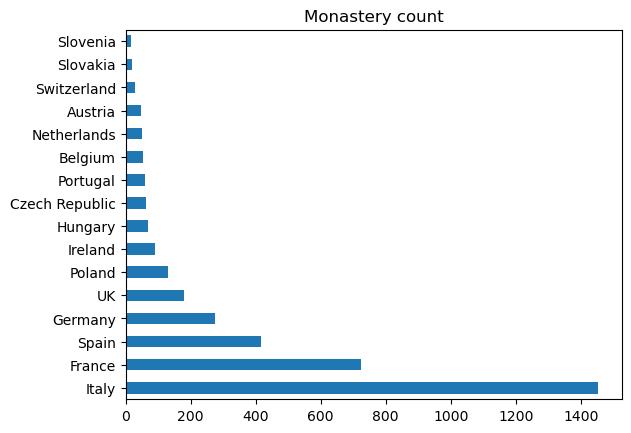

In [8]:
data1.Country.value_counts().plot(kind="barh")
plt.title("Monastery count")

_____________________

# Part B – Training classifiers

7.	Define a variable X corresponding to the Starting and Ending columns of the dataset, and a variable y corresponding to the Monastery_index column. [1 mark]

In [9]:
X = data1[["Starting", "Ending"]]
y = data1["Monastery_index"]

8.	Perform a train-test split, separating X and y into a training test and a test set, leaving 33% of the data in the test set. [1 mark]

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


9.	Classification using a Perceptron:

a)	Fit a perceptron to the training data, and use it to predict y values for the test set.
[1 mark]

b)	Calculate the fraction of data points in the test set where the predicted y values and the actual y values differ. This fraction should be equal to zero if the prediction is perfect, and equal to 1 if the prediction is wrong for 100% of the test set. Print the value of that fraction in decimals (like 0.01, 0.2394, or 0.9999923).  [2 marks]

c)	Plot a confusion matrix showing how well the classifier performs on the test set. [1 mark]

d)	Treating “Franciscan” as “Positive” and “Cistercian” as “Negative”, Print out the precision, recall, accuracy and F1 score of the perceptron. [2 marks]

In [11]:
#Part a.

from sklearn.linear_model import Perceptron

model = Perceptron(random_state=1)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

print(y_pred)

[1 1 1 ... 1 1 1]


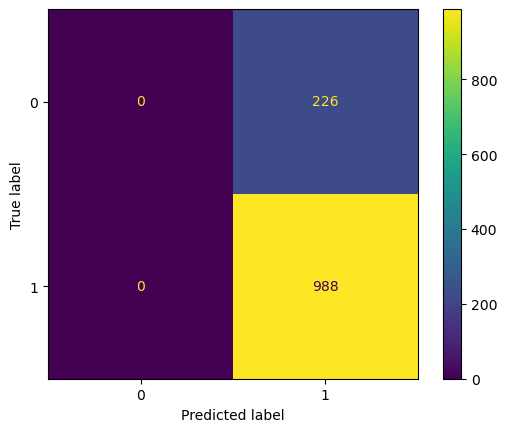

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmdisplay = ConfusionMatrixDisplay(confusion_matrix=cm)
cmdisplay.plot()

In [13]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

print("precision:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))


precision: 0.8138385502471169
recall score: 1.0
accuracy: 0.8138385502471169
f1_score: 0.8973660308810173


10.	Classification using Logistic Regression: do the same as the question above, but using the logistic regression classifier. [4 marks]

In [14]:
from sklearn.linear_model import LogisticRegression



log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log= log_reg.predict(X_test)

print(1-log_reg.score(X_test, y_test))


0.02224052718286651


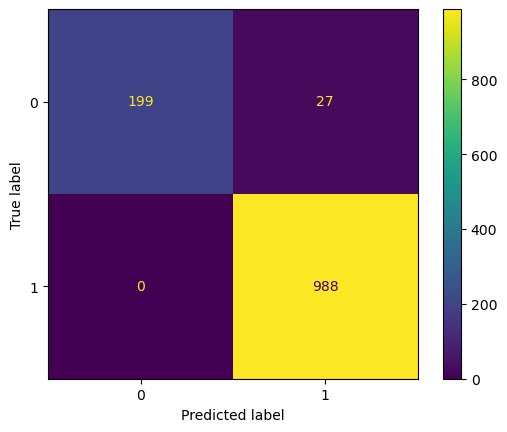

In [15]:
cmlog = confusion_matrix(y_test, y_pred_log)
cmlogdisplay = ConfusionMatrixDisplay(confusion_matrix=cmlog)
cmlogdisplay.plot()

In [16]:
print("precision:", precision_score(y_test, y_pred_log))
print("recall score:", recall_score(y_test, y_pred_log))
print("accuracy:", accuracy_score(y_test, y_pred_log))
print("f1_score:", f1_score(y_test, y_pred_log))


precision: 0.9733990147783251
recall score: 1.0
accuracy: 0.9777594728171335
f1_score: 0.9865202196704943


For open-ended questions like the ones below, write your answers in a new cell of code, either as a commented-out line starting with #, or as a markdown cell. Indicate what question you’re answering, by copying the question as well. For example:

11.	Explain the importance of the train-test split in machine learning. What might happen if you don’t have a proper split? [ 2 marks ]

Train-test split allows the model to train itself on one part of the data as well as test how well it does compared to the remaining part of data. Such a test will show the accuracy and performance of the model. high accuracy and efficient performance are required for a good machine learning model.

In case of an improper split, the model is likely to be inaccurate where the model may be either overfitting or underfitting the data. Overfitting when there is too much train data and underfitting in case of too much test data.

12.	Which classifier (Perceptron or Logistic Regression) performed better at this task? Explain how you’ve arrived at this answer. [4 marks] 

Logistic regression performed better than a perceptron. Perceptron model simply predicted all values to be 1 which although results in a perfect recall score of 1.0, lacks in other scores; accuracy, precision and f1. That is because it is completely unable to correctly predict true negatives, having many false postives.

Logistic regression has very high scores all around (0.95 and above) and exceeded perceptron in them except for recall score. It was able to predict true positives and true negatives most of the time having very false positives and false negatives.

13.	If you run the code from questions 8, 9, and 10 again, do the scores (precision, recall, accuracy, F1) change? Why (or why not)? Explain where those scores come from, and how do they change (or don't change) if you run the code again. [3 marks]

The scores change with every run, but marginally. Although the data is split randomly everytime, logistic regression still performs significantly better with all scores being above 0.95. On the other hand, perceptron predicts true for most if not all of the data. This leads to worse scores than logistic regression except in the case of recall score as it calculates true positives which are automatically accounted for. However, perceptron does predict all false in some runs. This leads to poor scores overall: precision, recall, f1 at 0 and accuracy at ~0.2

_______________

# Part C – Linear Regression

14. Read the file `dataset2.csv` into a dataframe. Make four scatterplots, with different variables (different columns) on the x and y axes, with the variable `quality` on the colour axis. For each scatterplot, choose a different pair of x and y variables, which cannot include `quality`. [1 mark]

<Axes: xlabel='total sulfur dioxide', ylabel='density'>

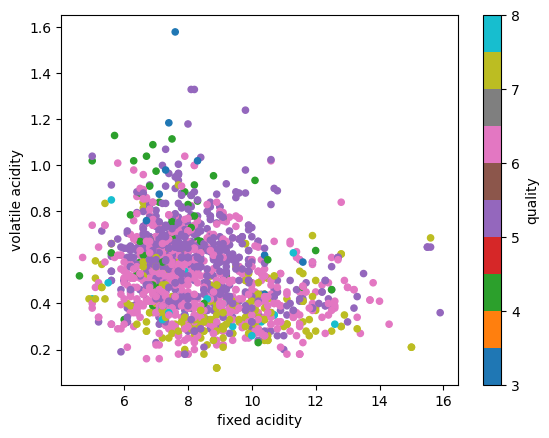

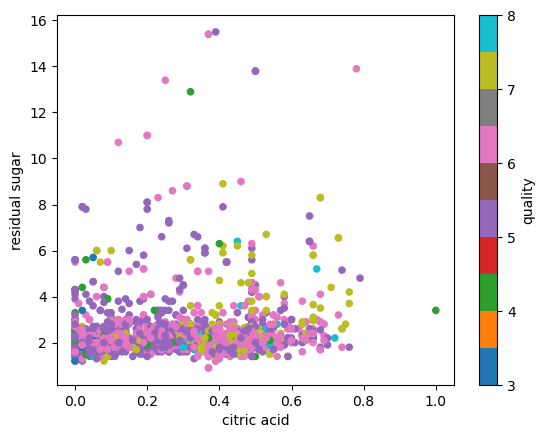

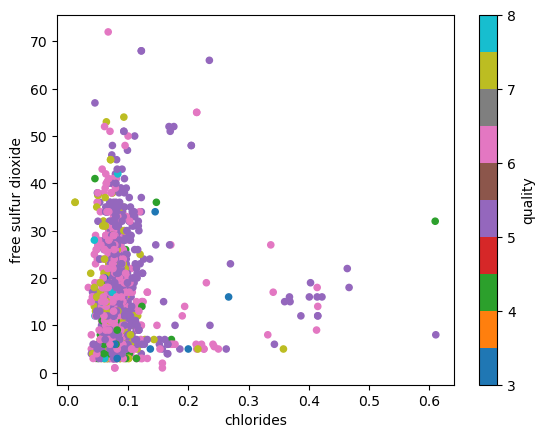

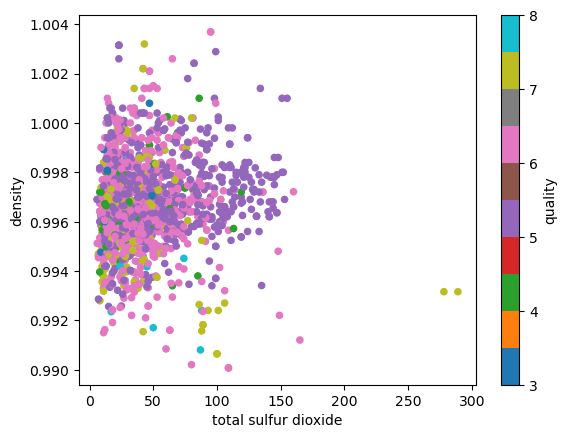

In [17]:
data2 = pd.read_csv('dataset2.csv')

data2.plot.scatter(x="fixed acidity", y="volatile acidity", c="quality", cmap="tab10")

data2.plot.scatter(x="citric acid", y="residual sugar", c="quality", cmap="tab10")

data2.plot.scatter(x="chlorides", y="free sulfur dioxide", c="quality", cmap="tab10")

data2.plot.scatter(x="total sulfur dioxide", y="density", c="quality", cmap="tab10")

15. Print the Pearson correlation between the pairs of variables you have included in the scatterplots. 
For every pair of variables, print the names of the variables, and the corresponding correlation. 
[1 mark]

In [18]:
from scipy import stats

print("fixed acidity - volatile acidity:", stats.pearsonr(data2["fixed acidity"], data2["volatile acidity"]))
print("")
print("citric acid - residual sugar:",stats.pearsonr(data2["citric acid"], data2["residual sugar"]))
print("")
print("chlorides - free sulfur dioxide:",stats.pearsonr(data2["chlorides"], data2["free sulfur dioxide"]))
print("")
print("total sulfur dioxide - density:",stats.pearsonr(data2["total sulfur dioxide"], data2["density"]))


fixed acidity - volatile acidity: PearsonRResult(statistic=-0.2561308947703821, pvalue=2.276720443176551e-25)

citric acid - residual sugar: PearsonRResult(statistic=0.14357716157031414, pvalue=8.083723190064218e-09)

chlorides - free sulfur dioxide: PearsonRResult(statistic=0.005562147004781111, pvalue=0.8241238441622845)

total sulfur dioxide - density: PearsonRResult(statistic=0.07126947620310317, pvalue=0.004354283989411967)


16. Linear regression: [2 marks]
    
a) Choosing the input variable X corresponds to any three columns of the dataset, except for `quality`, and the variable y corresponds to the `quality` column.

b) Fit a linear regression between X and y.

c) Print out the R2 score of the linear regression.

d) Print out the linear regression model’s slope coefficients and intercept.

In [19]:
from sklearn.linear_model import LinearRegression

X = data2[["fixed acidity", "volatile acidity", "density"]]
y = data2["quality"]

lin_reg = LinearRegression()

lin_reg.fit(X,y)

R2 = lin_reg.score(X,y)

print("R2 is", R2)
print('Slope:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)

R2 is 0.21878448228881586
Slope: [ 1.31444226e-01 -1.39857104e+00 -1.52930424e+02]
Intercept: 157.71354079390022


17. K-fold cross-validation [3 marks]

a) Using the same X and y variables defined in the question above, perform a K-fold cross-validation of the linear regression model, with K = 10.

b) For each fold, calculate the R2 score.

c) Print the mean and standard deviation of the five R2 scores.

In [20]:
from sklearn.model_selection import cross_val_score, KFold 

kf = KFold(n_splits=10, random_state=42, shuffle=True)

scores = cross_val_score(lin_reg, X, y, cv=kf, scoring="r2")

print(scores)


[0.26902729 0.28118334 0.13326262 0.13981814 0.26115685 0.12720048
 0.23764688 0.15335264 0.26305384 0.25408861]


In [21]:
from statistics import mean, stdev

print("mean:", mean(scores))
print("standard deviation:", stdev(scores))

mean: 0.21197906968752395
standard deviation: 0.06457623838488218


18.	If, rather than choosing three columns, you had used more columns to predict quality, would the R2 score of your model necessarily be higher? Why/why not? In which circumstances would it be higher or not? (Feel free to try it! But please provide a justification for your answer) [3 marks]

More variables, or columns, can only increase or leave the value of R2 the same. Even if the variable is completely irrelevant and doesnt explain any variance, it still doesnt lower R2. However, if a variable does have even the smallest effect on the quality, R2 will increase.

19.	Imagine you have two linear regressions, one with R2 = 0.80 and another with R2 = 0.90. Under what circumstances would the first model be preferable over the second one? What if instead you had two classifiers, one with accuracy = 80% and another with accuracy = 90%? [3 marks]

If the linear regression with R2 of 0.8 requires significantly less variables than the one with R2 of 0.9, the first one would be preferable. That is because it would require much less money and time to be spent, for instance, on data collection. 

In case of a classifiers, in spheres like medicine, false postives are very important to be minimized, therefore they may choose 80% accurate classfier over 90% accurate classifier because of less false negatives but more false positives.

_____________________

# Part D – Clustering

20. K-means clustering:

a) Read the file `dataset3.csv` into a dataframe.

b) Define a variable X corresponding to the `Longitude` and `Latitude` columns of the dataset.

c) Using the K-means clustering algorithm and the variable X, cluster the trees 3 times, using k = 5, 10, 15.

d) Make a scatterplot showing the results of each clustering, with one colour for each cluster.
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

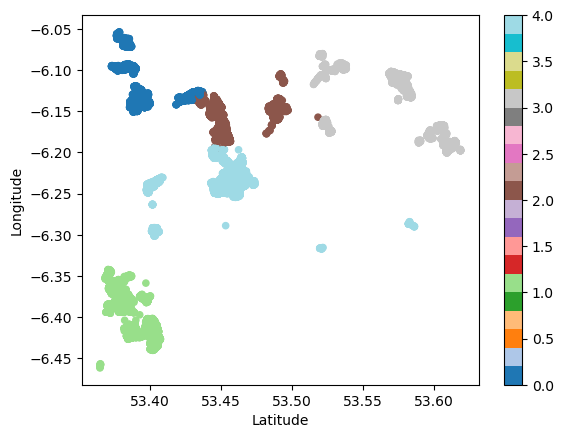

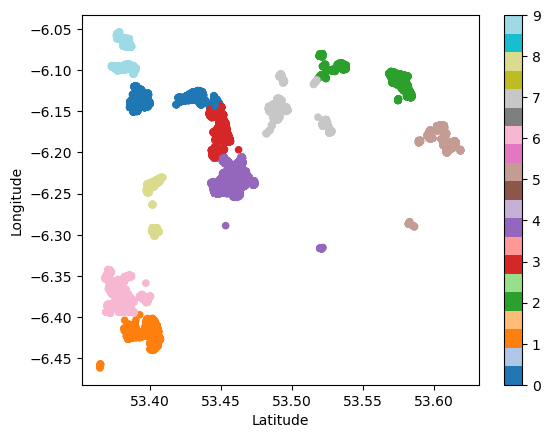

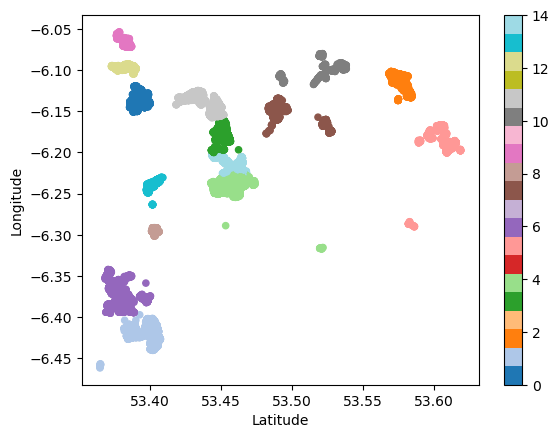

In [22]:
data3 = pd.read_csv('dataset3.csv')
from sklearn.cluster import KMeans

X = data3[["Longitude", "Latitude"]]



for k in [5, 10, 15]:
    kmeans = KMeans( n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    data3.plot.scatter(x="Latitude", y="Longitude",  c=y_kmeans, cmap="tab20")
   
    
    
  


21. DBSCAN clustering:

a) Using the same X variable as above, using the DBSCAN clustering algorithm, cluster the trees a total of 4 times, setting the eps parameter to 0.001, 0.005, 0.01, 0.05.

b) Make a scatterplot showing the results of each clustering, with one colour for each cluster. 
Suggestion: use a categorical colour map such as tab10 or tab20.
[2 marks]

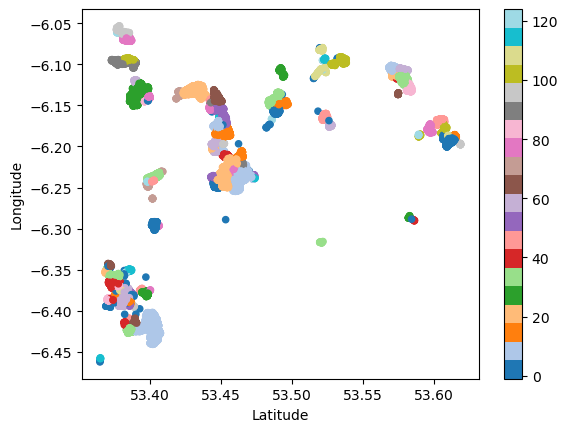

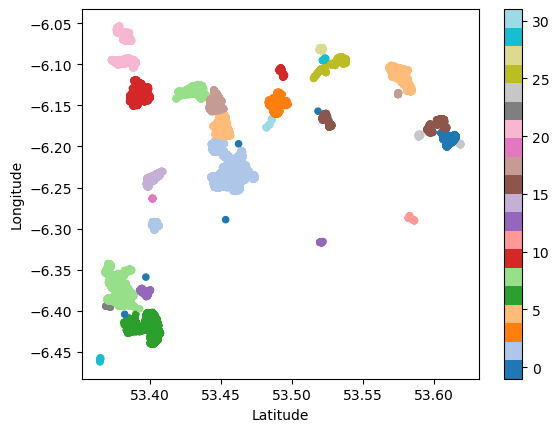

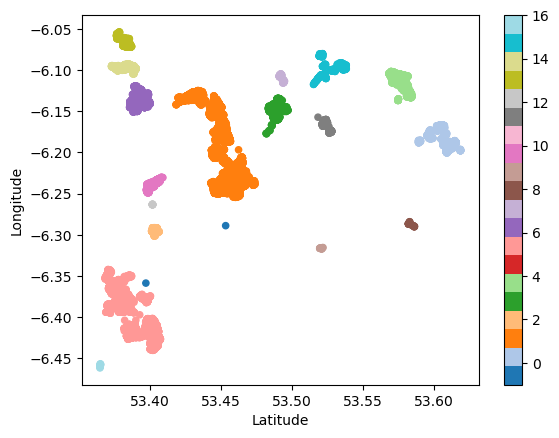

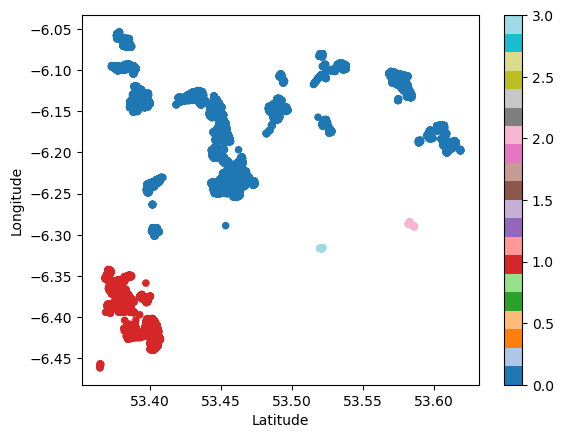

In [23]:
from sklearn.cluster import DBSCAN

for l in [0.001, 0.005, 0.01, 0.05]:
    dbscan = DBSCAN(eps=l)
    y_dbscan = dbscan.fit_predict(X)
    data3.plot.scatter(x="Latitude", y="Longitude",  c=y_dbscan, cmap="tab20")
   




22. Using the Silhouette score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the 
best clustering, according to the Silhouette score? [2 marks]

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


for k in [5, 10, 15]:
    kmeans = KMeans( n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    print("silhouette score for", k, "folds is", silhouette_score(X, y_kmeans))
    
for l in [0.001, 0.005, 0.01, 0.05]:
    dbscan = DBSCAN(eps=l)
    y_dbscan = dbscan.fit_predict(X)
    print("silhouette score for esp",l, "is", silhouette_score(X, y_dbscan))
print(" ")
print("15fold run produces the best clustering according to silhoette score\n","since it is the highest")

silhouette score for 5 folds is 0.5735077183140399
silhouette score for 10 folds is 0.6112932101000136
silhouette score for 15 folds is 0.6436947760351979
silhouette score for esp 0.001 is 0.24654779191379822
silhouette score for esp 0.005 is 0.5407076619493373
silhouette score for esp 0.01 is 0.39309460921661776
silhouette score for esp 0.05 is 0.43883380804344646
 
15fold run produces the best clustering according to silhoette score
 since it is the highest


23. Using the Davies-Bouldin score, compare the 3 runs of K-means and the 4 runs of DBSCAN. Which one of the 7 runs produces the best clustering according to the Davies-Bouldin score? [2 marks]

In [25]:
for k in [5, 10, 15]:
    kmeans = KMeans( n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    print("davies-bouldin score for", k, "folds is", davies_bouldin_score(X, y_kmeans))
    
for l in [0.001, 0.005, 0.01, 0.05]:
    dbscan = DBSCAN(eps=l)
    y_dbscan = dbscan.fit_predict(X)
    print("davies-bouldin score for esp",l, "is", davies_bouldin_score(X, y_dbscan))

print(" ")
print("15fold run produces the best clustering according to davies-bouldin score\n","since it is the lowest")

davies-bouldin score for 5 folds is 0.6182828141902562
davies-bouldin score for 10 folds is 0.5523188949717283
davies-bouldin score for 15 folds is 0.43266641778759135
davies-bouldin score for esp 0.001 is 1.3049809967309858
davies-bouldin score for esp 0.005 is 0.8701655710038124
davies-bouldin score for esp 0.01 is 0.5967046437435546
davies-bouldin score for esp 0.05 is 0.4451886348997588
 
15fold run produces the best clustering according to davies-bouldin score
 since it is the lowest


24. Using another clustering algorithm (not K-means, not DBSCAN), and a range of hyperparameter values if appropriate, cluster the trees according to their latitude and longitude, as above. According to the silhouette and Davies-Bouldin scores, does any of your model runs produce better clustering? [2 marks]

davies-bouldin score for selection epsilon 0.001 is 1.2137555672600908
davies-bouldin score for selection epsilon 0.005 is 0.6703140378142728
davies-bouldin score for selection epsilon 0.01 is 0.4429651757270301
davies-bouldin score for selection epsilon 0.05 is 0.4451886348997588
 
15 fold clustering still has the best davies-boulding score but hdbscan
 with epsilons of 0.01 and 0.05 were very close 


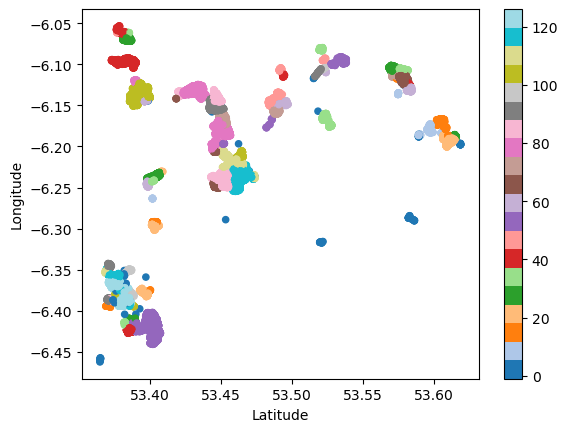

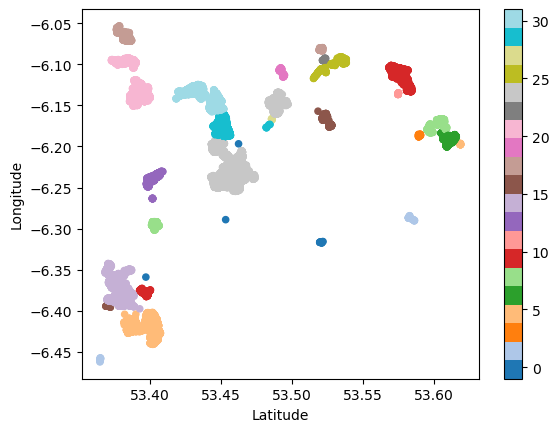

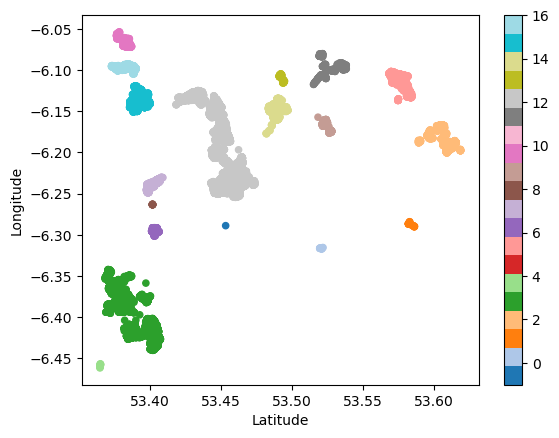

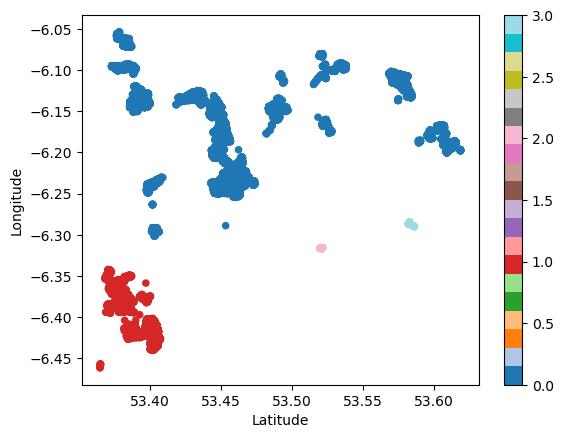

In [26]:
from sklearn.cluster import HDBSCAN

for h in [0.001, 0.005, 0.01, 0.05]:
    hdbscan = HDBSCAN(cluster_selection_epsilon=h)
    y_hdbscan = hdbscan.fit_predict(X)
    data3.plot.scatter(x="Latitude", y="Longitude",  c=y_hdbscan, cmap="tab20")
    print("davies-bouldin score for selection epsilon",h, "is", davies_bouldin_score(X, y_hdbscan))
    
print(" ")
print("15 fold clustering still has the best davies-boulding score but hdbscan\n with epsilons of 0.01 and 0.05 were very close ")
    

25. Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

DBSCAN forms clusters by defining neighbourhoods based on the parameters of epsilon and minimum number of points. This involves calculating distance between different points and comparing it to the epsilon threshold. These calculations can be very computationally intense which leads to long runtime. KMeans, on the other hand, only has to calculate the distances between points

26. Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

It might be better to use dbscan in cases where there is a lot of noise since dbscan is noise-resistant thanks to a differentiation of core, border and noise points. Such noise points are often outliers which are problematic especially for KMeans method as it may skew the centroids and include points that are seemingly unrelated.

KMeans is better used for large datasets with many dimensions where unlike DBSCAN it takes considerably less time due to being efficient. KMeans calculations are linear (n*d*k*t*) and proportional to runtime, therefore can scale to large data sets where dbscan algorithm is exponential, O(n^2), which is not suitable for large data sets.  

_____________________

# Part E – Model selection

27. Consider the figure in the PDF and compare models A and B. In each case, what difference would it make to add more training examples to the training set? Explain your reasoning. [4 marks]

Adding more training data to model A will have no effect on the error rate. The model is already underfitting and adding more training data will make no change to the curves. The curves have converged at around 110 test size and adding more will not improve the model

In model B, adding more training data will improve the model. The model is a bit overfitting so more training data will decrease the testing error but marginally increase training error.

28.	Consider the second figure in the PDF and compare models A, B, and C. What is the difference between the three models? How does that relate to the bias-variance trade-off? [6 marks]

Model A has high training and testing error. There is also a trade-off with low variance but high bias. It is therefore underfitting and more variables may improve the model.

Model B is clearly the better model our of all three. It has both training and testing error rates low with a balanced amount of bias and variance.

Model C has high variance, but low bias. Although the training error is relatively low, the testing error is high. It is clear that the model is overfitting and bad at generalising so decreasing the number of variables may improve the model. 




A - high bias and high error rates - underfitting

B - balanced trade-off and low error rates - spot on

C - high variance and high testing error rate - overfitting

29.	What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]

overfitting occurs when the model has been trained on so much training data and has so many degrees of freedom that it fails to generalize trends and performs poorly on testing data, having high variance. Overfitting is a problem because it renders the model useless since it will fail to generalize trends in data other than training.

It can be avoided by giving the model less degrees of freedom and having balanced training to testing data ratio. 

________________

# Part F – Dimensionality reduction

Consider a scenario where you are working with a complex high-dimensional dataset derived from a biomedical application to detect a disease. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for the following purposes: first, to visualize the data in a lower-dimensional space to identify potential clusters or patterns that might indicate different disease states, and second, to preprocess the data for a downstream machine learning task, such as classification of samples into healthy or diseased states. 

30.	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

With PCA, you can get a lot of information just with the first PCs and it especailly works well with highly correlated data. PCA can be visualised with bar graph with PCs where the first ones can already show lots of variance.

PCA may be useless when all the variables are equally important and uncorrelated since in this case PCA's rotations and reflections will result in, although less-dimensional but similar and uninformative data sets. It is also computationally heavy, with runtimes being the cubic of the number of dimensions.


t-SNE is very good for visualising highly dimensional data into much less dimensions. It preserves local data very well, forming clusters.

On the other hand, t-SNE is bad for preserving global structure. Distances between clusters do not matter; no way to tell whether clusters are related to each other especially when axes dont have meanings . Additionally, t-SNE is computationally intense and slow because it relies on randomness.


UMAP, compared to t-SNE, is faster and more computationally efficient while being able to preserve global structure. It is also predominantly good at local structure.

However, just like t-SNE, UMAP is highly dependant on its hyperparameters. Slight change in them might result in complete different outcomes. It also has issues with interpretations of the x and y axes which may not be suitable when visualising data.




31.	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

PCA is computationally efficient and is therefore suitable for large data sets. If the visualisation shows linear relationships and preservation of global structures is critical, PCA might especially be useful. Moreover, PCA deals with noisy data best during preprocessing.

t-SNE may be preffered over PCA if the the preservation of local structures is more important than of global structures. Though, t-SNE is more computationally intensive so smaller data sets are needed.

However, if the local structures are as important as global, UMAP is the superior technique. UMAP is also more preferred when dealing with non-linear relationships

32.	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

If the interpretability of the outcome is more important, PCA is a superior choice because of its clear linear calculations. t-SNE and UMAP also are less stable and less reproducible. Their stochastic nature, i.e. they use random initial points, means that with every run the outcome is different unlike PCA which results in the same outcome. However, PCA assumes linear relationships even when the data is non-linear. This may cause loss of information and skewed conclusions.

________________

# Part G – Applications of Machine Learning

33.	Discuss a scenario where a high accuracy rate might be misleading in evaluating the performance of a classifier. What other metrics would you consider, and why? [3 marks]

Accuracy rate measures the overall correctness of a model and high number of true positives may skew the perception of it. For instance, if 90% of data is true, the model may guess true for all of the data. 90% may seem high but it is misleading and even dangerous like when determining whether the construction materials are up to standards. Reduction of false positives is critical in this sphere.

Precision is a good metric to consider. It calculates the accuracy of the model at predicting the positive outcomes (TP/TP+FP). It is especially useful in scenarios like mentioned earlier where the cost of false positives is very high.



34. Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

Precision measures how correct the model's "true" guesses are. Recall measures how good the model is at detecting true outcomes. These measures are inversely related so there is a trade-off.

If the model is good at minimising false negatives, it has a high recall score, but it may lead to lower precision since it may classify some false data positive just to be safe.

Recall score may suffer when higher precision is preferred. The model may avoid classifying too much data positive in order to prevent false positives. This may therefore lead to it leaving a lot of false negatives which decreases recall score.

35. In the case of the question above, the data scientist might have to choose between having higher precision or higher recall. Provide an example where it’s preferable to get high recall and low precision (and explain why), and another example where it’s preferable to have high precision and low recall (and explain why). [4 marks]

When diagnosing a disease, high recall score with few false negatives is crucial. Having lots of false negatives will leave lots of patients without treatment so precision may be sacrificed. Since treating healthy people has no harm, having lots of false positives, i.e. low precision, is acceptable.

In cases when the reduction of false positives is more important, high precision is vital. For instance, it is important that construction materials are all up to standard so the model has to detect and minimise subpar materials, i.e. false positives. This does however cause some actually good materials (false negatives) to be thrown leading to lower recall score, but the cost of false positives is too high to risk.

Over this module we explained many examples where a machine learning algorithm was trained on a dataset and became reasonably good at a task, but had a fundamental flaw in its training dataset or feature engineering that ultimately made the model inaccurate or inappropriate for use in real life.

36. Give an example of a machine learning algorithm trained for a particular task where it achieves high accuracy in one context, but low accuracy in another context. Explain what could cause that, how to diagnose it, and suggest a way to address it. [4 marks]

When the data is dominated by one class, the model may simple guess all the data to be that class. Although it may score high accuracy, it will fail to recognise the other classes. When given another, more balanced data, the model might still guess all data to be of one class. This will lead to much lower accuracy rates. The way to diagnose such a problem is by finding which class has 100% accuracy and the way to avoid it is to train the model on a more diverse data.

37. Give an example of a machine learning algorithm that might have low errorin its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

The model might have low testing and training error rates while identifying and differentiating a horse from a camel. However, it might do so based on the background of the image where horses are typically pictured in the field and camels are in the desert. The model does not actually pick up the clues from the animals themselves which may cause problems if there is no background in the next picture.

This fundamental flaw may be addressed if the pictures are more diverse, i.e. they have different backgrounds, poses and contexts.

_________________